SETING UP THE LIBARIES

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.offline as po
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
import plotly.graph_objs as pg

In [166]:
po.init_notebook_mode(connected= True)
cf.go_offline()

Some data visualization 

In [167]:
df = pd.read_csv("heart.csv")

In [168]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [169]:
#infomation of data
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [170]:
#checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [171]:
#target column
df.groupby("target").size()

target
0    138
1    165
dtype: int64

In [172]:
#df have this row and colmuns
df.shape

(303, 14)

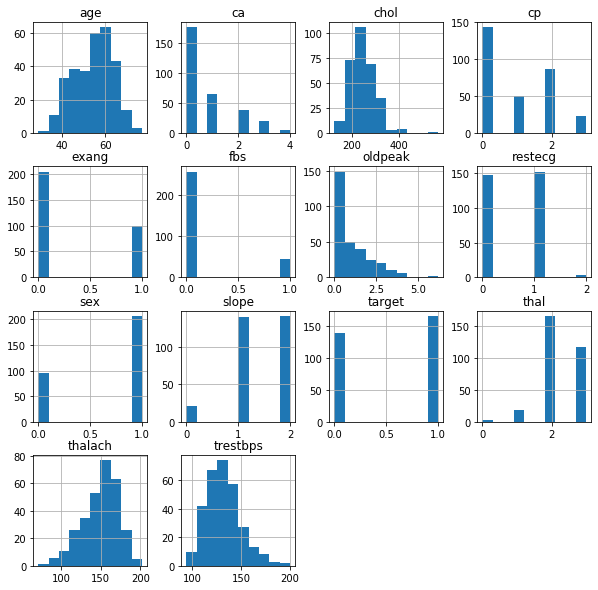

In [173]:
#every colmuns histogram
df.hist(figsize=(10,10));

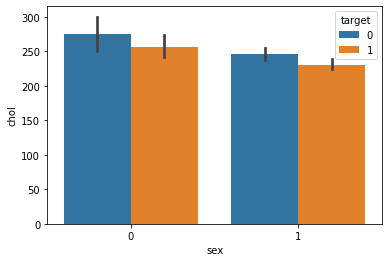

In [174]:
#anayl that according sex and cholestrol and by what they get target
sns.barplot(df["sex"],df["chol"],hue=df["target"]);

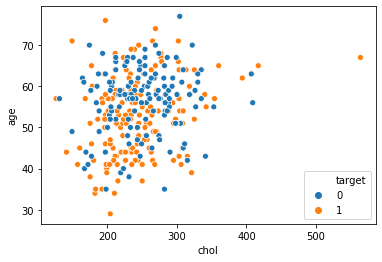

In [175]:
#just anayl the cholestrol level with age and  with target person
sns.scatterplot(df["chol"],df["age"],hue=df["target"]);

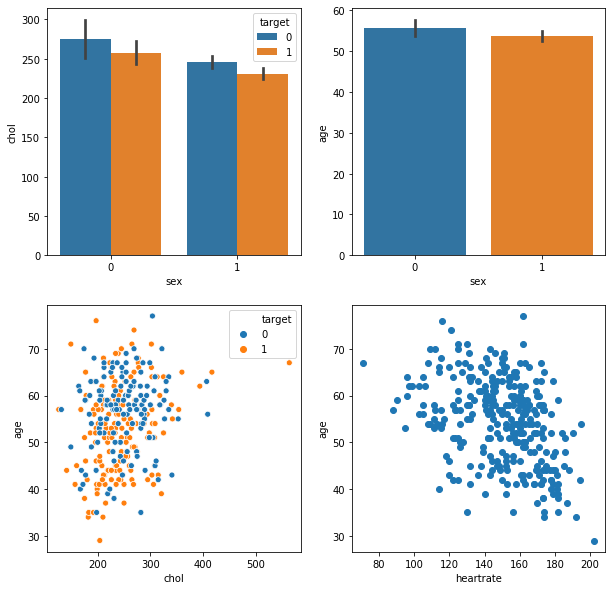

In [176]:
#CHAT ANAYL OF DIFFERENT COLUMNS
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(df["sex"],df["chol"],hue=df["target"]);
#sex and age that get target
plt.subplot(2,2,2)
sns.barplot(df["sex"],df["age"]);
#graph that cholestrol with age
plt.subplot(2,2,3)
sns.scatterplot(df["chol"],df["age"],hue=df["target"]);
#graph between heart rate 
plt.subplot(2,2,4)
plt.scatter(df["thalach"],df["age"])
plt.xlabel("heartrate");
plt.ylabel("age");

In [177]:
num_cols= ["age","trestbps","chol","thalach","oldpeak"]

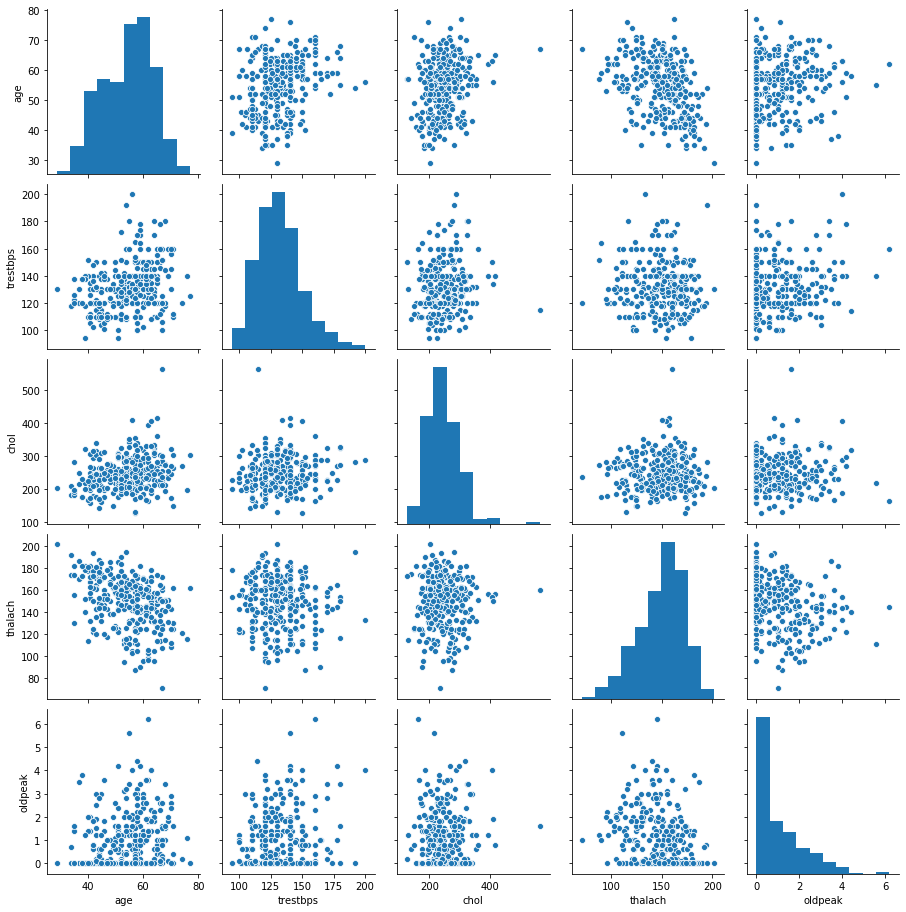

In [178]:
#plots of all numeric value
sns.pairplot(df[num_cols]);

COMPARE THE AGE,CHOLSERTROL,HEART RATE

Text(0.5, 1.0, 'max chol  heart with disease')

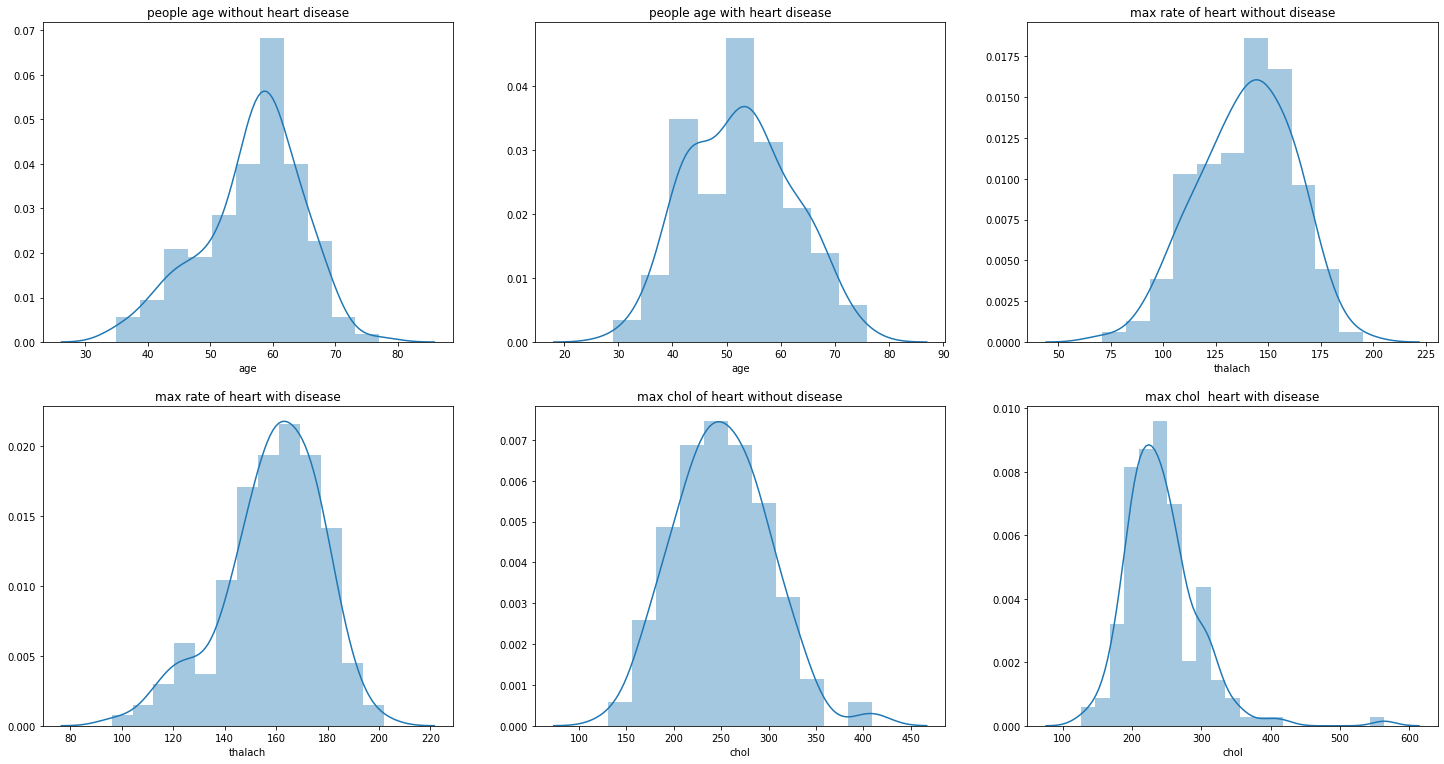

In [179]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
sns.distplot(df[df["target"]==0].age)
plt.title("people age without heart disease")
plt.subplot(3,3,2)
sns.distplot(df[df["target"]==1].age)
plt.title("people age with heart disease")
plt.subplot(3,3,3)
sns.distplot(df[df["target"]==0].thalach)
plt.title("max rate of heart without disease")
plt.subplot(3,3,4)
sns.distplot(df[df["target"]==1].thalach)
plt.title("max rate of heart with disease")
plt.subplot(3,3,5)
sns.distplot(df[df["target"]==0].chol)
plt.title("max chol of heart without disease")
plt.subplot(3,3,6)
sns.distplot(df[df["target"]==1].chol)
plt.title("max chol  heart with disease")

BUILDING THE MODEL......

In [180]:
#setting up the libaries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [181]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [182]:
X = df.iloc[:,:13]

In [183]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [184]:
y = df.iloc[:,-1]

In [185]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [187]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [188]:
heart_model = DecisionTreeClassifier()
heart_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [189]:
prediction = heart_model.predict(X_test)
heart_accuracy = accuracy_score(prediction,y_test)*100

In [190]:
heart_accuracy

76.92307692307693

FINDING WHICH FEATURE IS BEST 

In [191]:
heart_model.feature_importances_

array([0.07975366, 0.03461456, 0.34803953, 0.05530712, 0.09938805,
       0.        , 0.0129521 , 0.07342127, 0.04724994, 0.05484143,
       0.07645805, 0.10975468, 0.0082196 ])

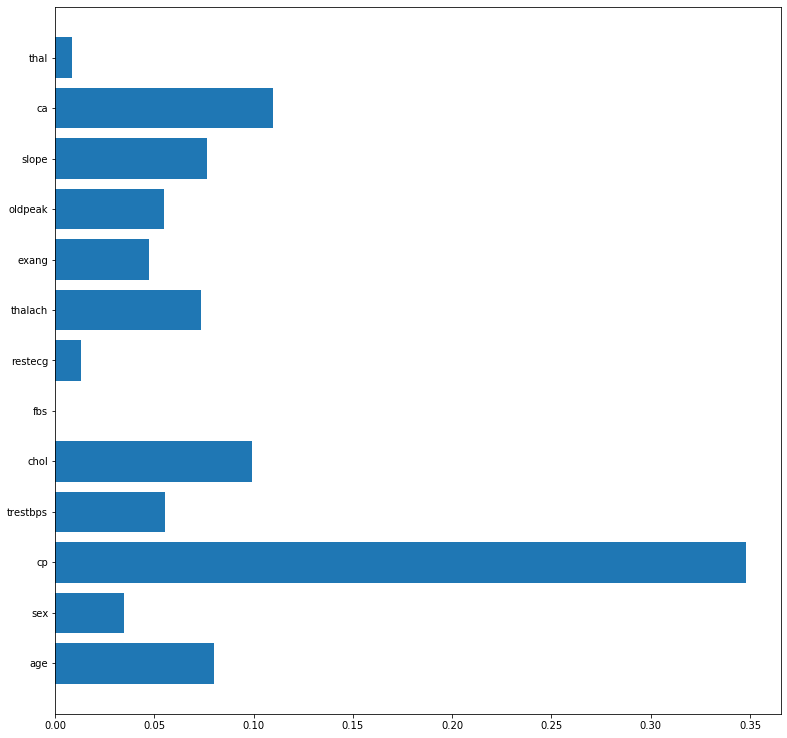

In [192]:
def feature_best(heart_model):
    plt.figure(figsize=(13,13))
    n_features = 13
    plt.yticks(range(n_features),X)
    plt.ylim(-1,n_features)
    plt.barh(range(n_features),heart_model.feature_importances_)
feature_best(heart_model)    

In [193]:
Category = [" YOURE HEART IS HEALTHY","HEART IS WEAK TAKE CARE...EAT HEALTHY"]

In [194]:
custom_data = np.array([[57,0,1,130,236,0,0,174,0,0.0,1,1,2]])
custom_data_predict = heart_model.predict(custom_data)

In [195]:
custom_data_predict

array([0], dtype=int64)

In [196]:
print(Category[int(custom_data_predict)])

 YOURE HEART IS HEALTHY


In [197]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
